<a href="https://oilprice.com/"><img src = "../images/wti.jpg" width = 400, align = "center"></a>
# <center>OIL PRICES OF MAJOR CRUDE OIL BENCHMARK(2003 - 2020)</center>

#### About this Notebook
In this notebook, we would use web scrapping technique to extarct the prices of the top three crude oil benchamerks from 2000 till 2020 for in the world. The data is scrapped from different sources including:
1. [WIKIPEDIA source](https://en.wikipedia.org/wiki/List_of_countries_by_oil_production)
2. [OPEC source](https://en.wikipedia.org/wiki/List_of_countries_by_oil_production)
3. [Other source](https://)
4. [CBN source](https://www.cbn.gov.ng/rates/crudeoil.asp)
5. [Quandl sources](https://www.quandl.com/api/v3/datasets/OPEC/ORB.csv)

The dataset is  then cleaned, presented in various visualisation patterns using different visualisation libraries and tools before exporting into a readable format for references (which can be used to build simple-regression or multi-regression models using machine learning techniques).

### TASK(S)
1. EXTRACT THE PRIMARY SELLING PRICE **BRENT CRUDE** FOR THE PERIOD (2000 -  2020)
2. EXTARCT THE PRIMARY SELLING PRICE  **WESTERN TEXAS INTERMIDATE [WTI]**  FOR THE PERIOD (2000 – 2020)
3. EXTARCT THE PRIMARY SELLING PRICE FOR **BONNY LIGHT** FOR THE PERIOD (2000 -  2020)
4. COMBINE THEM FIGURES INTO A **READBLE FORMAT**

### Import dependencies

In [1]:
%matplotlib inline
from datetime import datetime, timedelta
import itertools # 
import matplotlib as mpl #
import matplotlib.pyplot as plt #
import matplotlib.dates as mpl_dates
import numpy as np # imports numpy library
import pandas as pd #imports pandas library
import json # imports json library

### Import general price dataset

In [10]:
# General Price of crude from 2003 - 2020
opec_price_df = pd.read_csv('https://www.quandl.com/api/v3/datasets/OPEC/ORB.csv')
opec_price_df.tail(5)

,Date,Value
4666,2003-01-08,28.86
4667,2003-01-07,29.72
4668,2003-01-06,30.71
4669,2003-01-03,30.83
4670,2003-01-02,30.05


In [11]:
#since we notice it is displaying from the most recent to the former
#let reverse the order of the dataframe (opec_price_df)
rev_opec_price_df=opec_price_df.reindex(index=opec_price_df.index[::-1])
rev_opec_price_df

#then reorder the dataframe
rev_opec_price_df = rev_opec_price_df.reset_index(drop=True)
rev_opec_price_df

,Date,Value
0,2003-01-02,30.05
1,2003-01-03,30.83
2,2003-01-06,30.71
3,2003-01-07,29.72
4,2003-01-08,28.86
...,...,...
4666,2021-02-04,58.25
4667,2021-02-05,58.92
4668,2021-02-08,59.58
4669,2021-02-09,60.28


In [12]:
#rename the column of the dataframe of the (rev_opec_price_df)
rev_opec_price_df = rev_opec_price_df.rename(columns={"Date": "Date(YY/MM/DD)", "Value":"Price($)"} )
rev_opec_price_df.head(2)

,Date(YY/MM/DD),Price($)
0,2003-01-02,30.05
1,2003-01-03,30.83


### Import brent crude price (daily, weekly, monthly, yearly)

In [13]:
#Import the price of Brent from 2003 -2020
wti_price_daily_df = pd.read_csv(r"./data/wti-daily.csv")
wti_price_weekly_df = pd.read_csv(r"./data/wti-weekly.csv")
wti_price_monthly_df = pd.read_csv(r"./data/wti-monthly.csv")
wti_price_yearly_df = pd.read_csv(r"./data/wti-year.csv")

In [14]:
#display the heading of the record 
wti_price_daily_df.head(2)

,Date,Price
0,1986-01-02,25.56
1,1986-01-03,26.00


In [15]:
#display the heading of the record 
wti_price_weekly_df.head(2)

,Date,Price
0,1986-01-03,25.78
1,1986-01-10,25.99


In [16]:
#display the heading of the record  
brent_price_monthly_df.head(2)

,Date,Price
0,1986-01-15,22.93
1,1986-02-15,15.46


In [17]:
#display the heading of the record
brent_price_yearly_df.head(2)

,Date,Price
0,1986-06-30,15.05
1,1987-06-30,19.20


In [19]:
# Rename Columns for each of the brent Price records
wti_price_daily_df2=wti_price_daily_df.rename(columns={"Date": "Date(YY/MM/DD)", "Price":"Price($)"})
wti_price_weekly_df2=wti_price_weekly_df.rename(columns={"Date": "Date(YY/MM/DD)", "Price":"Price($)"})
wti_price_monthly_df2=wti_price_monthly_df.rename(columns={"Date": "Date(YY/MM/DD)", "Price":"Price($)"})
wti_price_yearly_df2=wti_price_yearly_df.rename(columns={"Date": "Date(YY/MM/DD)", "Price":"Price($)"})

#print out the abridge dataframe
print(wti_price_daily_df2)
print(wti_price_weekly_df2)
print(wti_price_monthly_df2)
print(wti_price_yearly_df2)

     Date(YY/MM/DD)  Price($)
0        1986-01-02     25.56
1        1986-01-03     26.00
2        1986-01-06     26.53
3        1986-01-07     25.85
4        1986-01-08     25.87
...             ...       ...
8836     2021-01-26     52.61
8837     2021-01-27     52.81
8838     2021-01-28     52.26
8839     2021-01-29     52.16
8840     2021-02-01     53.55

[8841 rows x 2 columns]
     Date(YY/MM/DD)  Price($)
0        1986-01-03     25.78
1        1986-01-10     25.99
2        1986-01-17     24.57
3        1986-01-24     20.31
4        1986-01-31     19.69
...             ...       ...
1826     2021-01-01     47.98
1827     2021-01-08     50.09
1828     2021-01-15     52.75
1829     2021-01-22     52.82
1830     2021-01-29     52.52

[1831 rows x 2 columns]
    Date(YY/MM/DD)  Price($)
0       1986-01-15     22.93
1       1986-02-15     15.46
2       1986-03-15     12.61
3       1986-04-15     12.84
4       1986-05-15     15.38
..             ...       ...
416     2020-09-15     39.6

### Visualisation Summary

#### Plots of Daily Price of Brent Oil

In [20]:
# data type of daily brent
print(wti_price_daily_df2.dtypes)

Date(YY/MM/DD)     object
Price($)          float64
dtype: object


In [21]:
# convert the date column to a usuable format in pandas

wti_price_daily_df2['Date(YY/MM/DD)'] =pd.to_datetime(wti_price_daily_df2['Date(YY/MM/DD)'])
wti_price_daily_df2.sort_values('Date(YY/MM/DD)', inplace=True)

# assign the values to be plotted
x=wti_price_daily_df2['Date(YY/MM/DD)']
y=wti_price_daily_df2['Price($)']

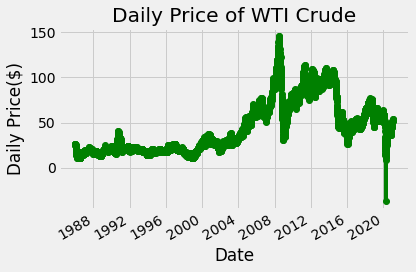

<Figure size 720x1080 with 0 Axes>

In [22]:
# Line Plot
plt.style.use('fivethirtyeight')
plt.plot_date(x, y, color='g', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Daily Price($)')
plt.title('Daily Price of WTI Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/wti_daily.png')
plt.show()

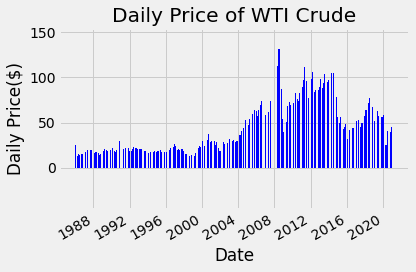

<Figure size 720x1080 with 0 Axes>

In [23]:
# Bar Plot
plt.style.use('fivethirtyeight')
plt.bar(x, y, color='b', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Daily Price($)')
plt.title('Daily Price of WTI Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/wti_daily-2.png')
plt.show()

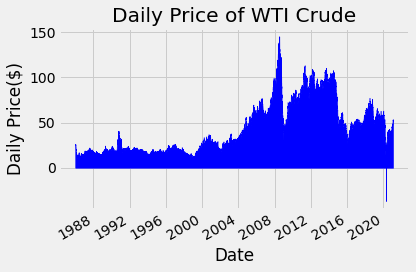

<Figure size 720x1080 with 0 Axes>

In [25]:
# Area Plot
plt.style.use('fivethirtyeight')
plt.stackplot(x, y, color='b', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Daily Price($)')
plt.title('Daily Price of WTI Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/wti_daily-3.png')
plt.show()

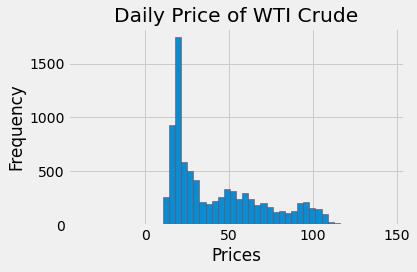

<Figure size 720x1080 with 0 Axes>

In [26]:
# Histogram Plot with no specified bins
plt.style.use('fivethirtyeight')
plt.hist(y, bins= 50, edgecolor='brown', linestyle='solid')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Daily Price of WTI Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/wti_daily-4.png')
plt.show()

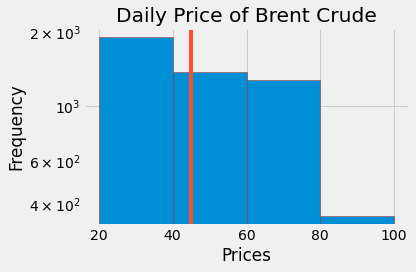

<Figure size 720x1080 with 0 Axes>

In [67]:
# Histogram Plot with  specified bins
plt.style.use('fivethirtyeight')
bins=[20, 40, 60, 80, 100 ]
plt.hist(y, bins=bins, edgecolor='brown', linestyle='solid', log=True)

median_price=
color="#fc4f30"
plt.axvline(median_price, color=color, label='Median Price')

plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Daily Price of Brent Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_daily-5.png')
plt.show()

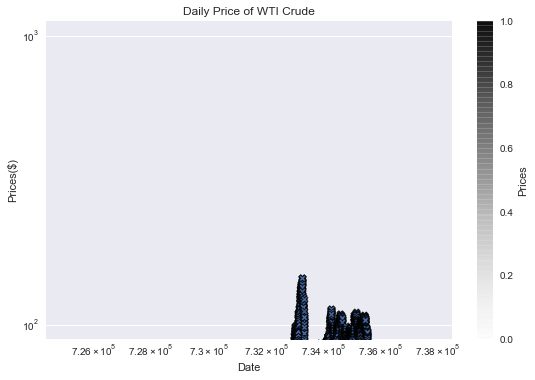

<Figure size 720x1080 with 0 Axes>

In [28]:
# Scatter Plot
plt.style.use('seaborn')
plt.scatter(x, y, edgecolor='black', alpha=0.75, 
            cmap='Greens', linewidth=1, marker='X')

cbar=plt.colorbar()
cbar.set_label('Prices')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Prices($)')
plt.title('Daily Price of WTI Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_wti-6.png')
plt.show()

#### Plot of Weekly Price of Brent Oil

In [39]:
# data type of weekly brent
print(wti_price_weekly_df2.dtypes)

Date(YY/MM/DD)     object
Price($)          float64
dtype: object


In [29]:
# convert the date column to a usuable format in pandas

wti_price_weekly_df2['Date(YY/MM/DD)'] =pd.to_datetime(wti_price_weekly_df2['Date(YY/MM/DD)'])
wti_price_weekly_df2.sort_values('Date(YY/MM/DD)', inplace=True)

# assign the values to be plotted
x_week=wti_price_weekly_df2['Date(YY/MM/DD)']
y_week=wti_price_weekly_df2['Price($)']

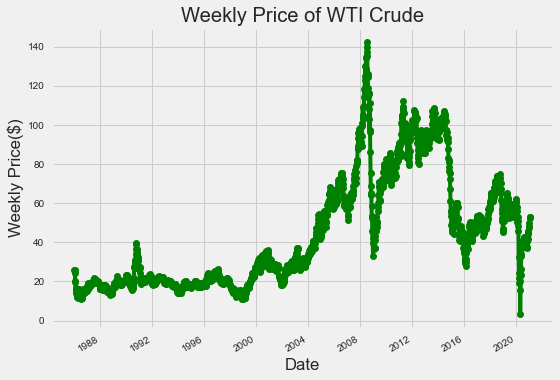

<Figure size 720x1080 with 0 Axes>

In [30]:
# Line Plot
plt.style.use('fivethirtyeight')
plt.plot_date(x_week, y_week, color='g', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Weekly Price($)')
plt.title('Weekly Price of WTI Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/wti_weekly.png')
plt.show()

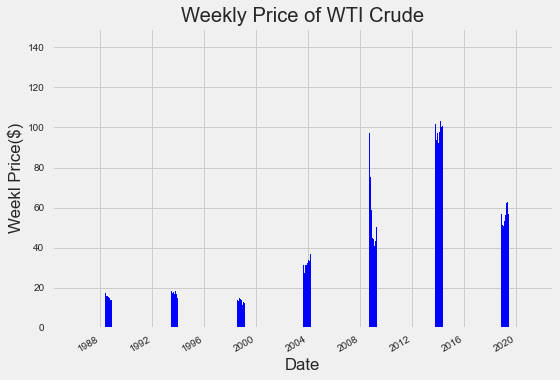

<Figure size 720x1080 with 0 Axes>

In [31]:
# Bar Plot
plt.style.use('fivethirtyeight')
plt.bar(x_week, y_week, color='b', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Weekl Price($)')
plt.title('Weekly Price of WTI Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/wti_weekly-2.png')
plt.show()

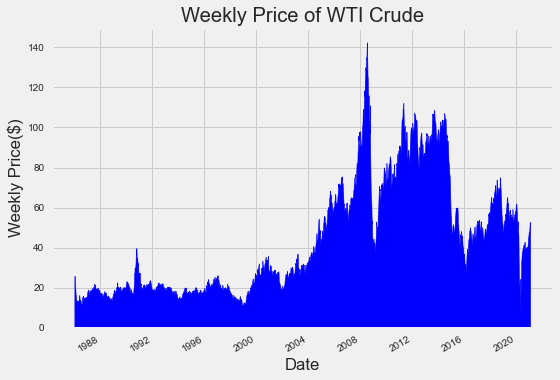

<Figure size 720x1080 with 0 Axes>

In [32]:
# Area Plot
plt.style.use('fivethirtyeight')
plt.stackplot(x_week, y_week, color='b', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Weekly Price($)')
plt.title('Weekly Price of WTI Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/wti_weekly-3.png')
plt.show()

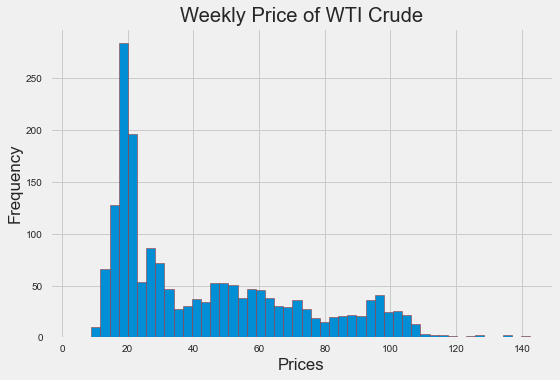

<Figure size 720x1080 with 0 Axes>

In [33]:
# Histogram Plot with no specified bins
plt.style.use('fivethirtyeight')
plt.hist(y_week, bins= 50, edgecolor='brown', linestyle='solid')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Weekly Price of WTI Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/wti_weekly-4.png')
plt.show()

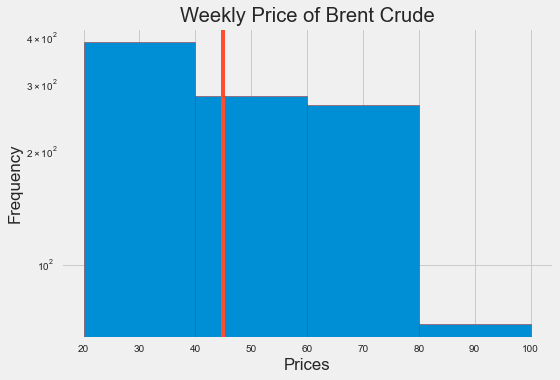

<Figure size 720x1080 with 0 Axes>

In [89]:
# Histogram Plot with  specified bins
plt.style.use('fivethirtyeight')
bins=[20, 40, 60, 80, 100 ]
plt.hist(y_week, bins=bins, edgecolor='brown', linestyle='solid', log=True)

median_price=45
color="#fc4f30"
plt.axvline(median_price, color=color, label='Median Price')

plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Weekly Price of Brent Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_weekly-5.png')
plt.show()

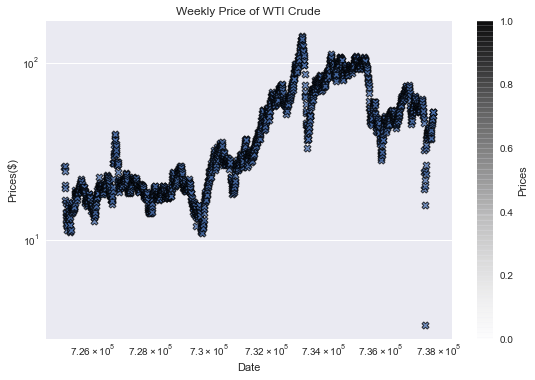

<Figure size 720x1080 with 0 Axes>

In [34]:
# Scatter Plot
plt.style.use('seaborn')
plt.scatter(x_week, y_week, edgecolor='black', alpha=0.75, 
            cmap='Greens', linewidth=1, marker='X')

cbar=plt.colorbar()
cbar.set_label('Prices')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Prices($)')
plt.title('Weekly Price of WTI Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/wti_weekly-6.png')
plt.show()

#### Monthly Price of Brent Oil

In [42]:
# data type monthly brent
print(wti_price_monthly_df2.dtypes)

Date(YY/MM/DD)     object
Price($)          float64
dtype: object


In [35]:
# convert the date column to a usuable format in pandas

wti_price_monthly_df2['Date(YY/MM/DD)'] =pd.to_datetime(wti_price_monthly_df2['Date(YY/MM/DD)'])
wti_price_monthly_df2.sort_values('Date(YY/MM/DD)', inplace=True)

# assign the values to be plotted
x_month=wti_price_monthly_df2['Date(YY/MM/DD)']
y_month=wti_price_monthly_df2['Price($)']

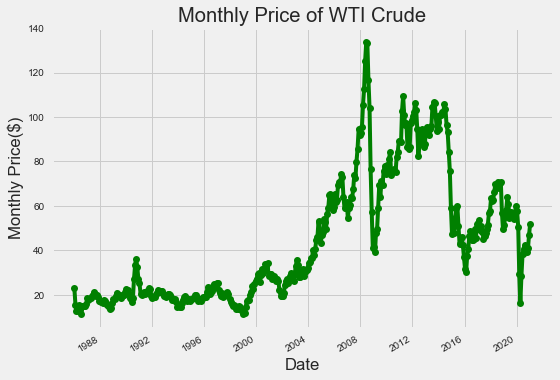

<Figure size 720x1080 with 0 Axes>

In [36]:
# Line Plot
plt.style.use('fivethirtyeight')
plt.plot_date(x_month, y_month, color='g', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Monthly Price($)')
plt.title('Monthly Price of WTI Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/wti_monthly.png')
plt.show()

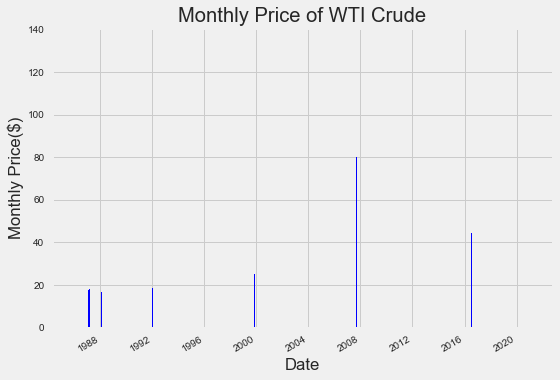

<Figure size 720x1080 with 0 Axes>

In [37]:
# Bar Plot
plt.style.use('fivethirtyeight')
plt.bar(x_month, y_month, color='b', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Monthly Price($)')
plt.title('Monthly Price of WTI Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/wti_monthly-2.png')
plt.show()

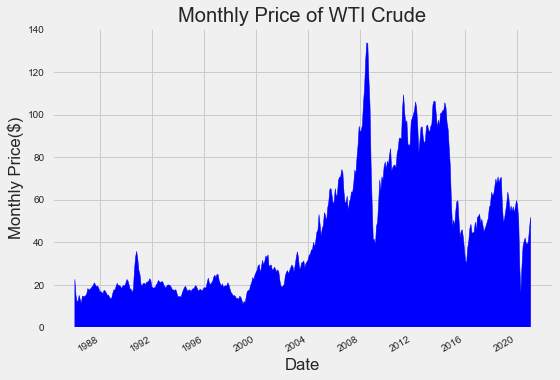

<Figure size 720x1080 with 0 Axes>

In [38]:
# Area Plot
plt.style.use('fivethirtyeight')
plt.stackplot(x_month, y_month, color='b', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Monthly Price($)')
plt.title('Monthly Price of WTI Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/wti_monthly-3.png')
plt.show()

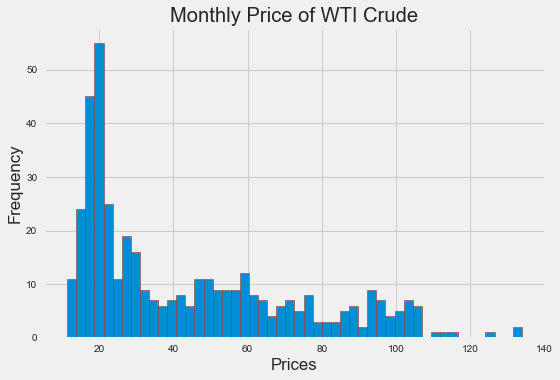

<Figure size 720x1080 with 0 Axes>

In [39]:
# Histogram Plot with no specified bins
plt.style.use('fivethirtyeight')
plt.hist(y_month, bins= 50, edgecolor='brown', linestyle='solid')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Monthly Price of WTI Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/wti_monthly-4.png')
plt.show()

In [40]:
# Histogram Plot with  specified bins
plt.style.use('fivethirtyeight')
bins=[20, 40, 60, 80, 100 ]
plt.hist(y_month, bins=bins, edgecolor='brown', linestyle='solid', log=True)

median_price=
color="#fc4f30"
plt.axvline(median_price, color=color, label='Median Price')

plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Monthly Price of WTI Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/wti_monthly-5.png')
plt.show()

SyntaxError: invalid syntax (<ipython-input-40-b2ec05c83497>, line 6)

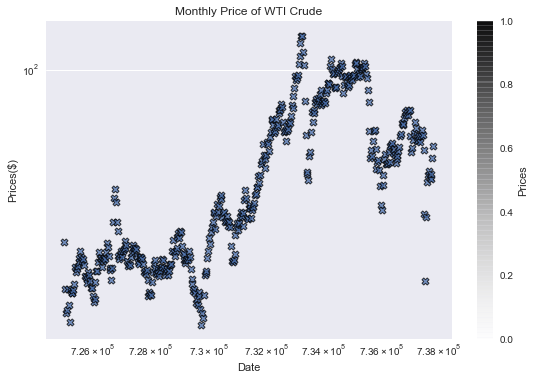

<Figure size 720x1080 with 0 Axes>

In [41]:
# Scatter Plot
plt.style.use('seaborn')
plt.scatter(x_month, y_month, edgecolor='black', alpha=0.75, 
            cmap='Greens', linewidth=1, marker='X')

cbar=plt.colorbar()
cbar.set_label('Prices')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Prices($)')
plt.title('Monthly Price of WTI Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/wti_monthly-6.png')
plt.show()

#### Yearly Price of Brent Oil

In [42]:
# data type of daily brent
print(wti_price_yearly_df2.dtypes)

Date(YY/MM/DD)     object
Price($)          float64
dtype: object


In [43]:
# convert the date column to a usuable format in pandas

wti_price_yearly_df2['Date(YY/MM/DD)'] =pd.to_datetime(wti_price_yearly_df2['Date(YY/MM/DD)'])
wti_price_yearly_df2.sort_values('Date(YY/MM/DD)', inplace=True)

# assign the values to be plotted
x_year=wti_price_yearly_df2['Date(YY/MM/DD)']
y_year=wti_price_yearly_df2['Price($)']

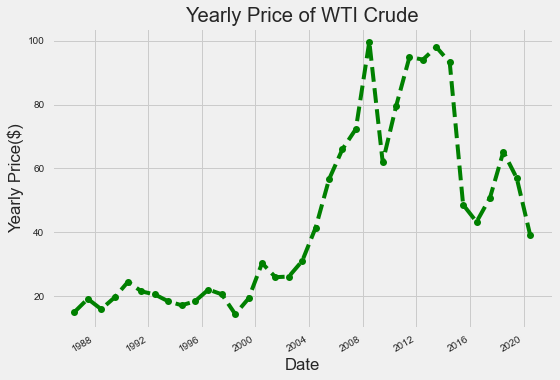

<Figure size 720x1080 with 0 Axes>

In [44]:
# Line Plot
plt.style.use('fivethirtyeight')
plt.plot_date(x_year, y_year, color='g', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Yearly Price($)')
plt.title('Yearly Price of WTI Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/wti_yearly.png')
plt.show()

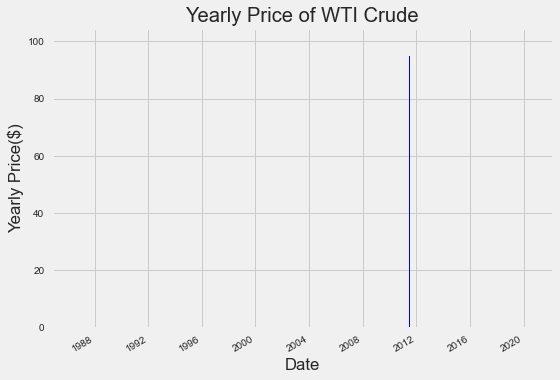

<Figure size 720x1080 with 0 Axes>

In [45]:
# Bar Plot
plt.style.use('fivethirtyeight')
plt.bar(x_year, y_year, color='b', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Yearly Price($)')
plt.title('Yearly Price of WTI Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/wti_yearly-2.png')
plt.show()

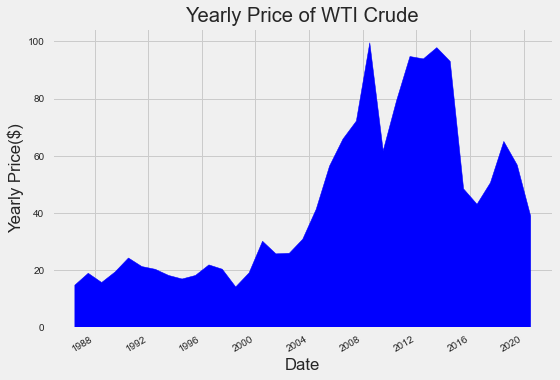

<Figure size 720x1080 with 0 Axes>

In [46]:
# Area Plot
plt.style.use('fivethirtyeight')
plt.stackplot(x_year, y_year, color='b', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Yearly Price($)')
plt.title('Yearly Price of WTI Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/wti_yearly-3.png')
plt.show()

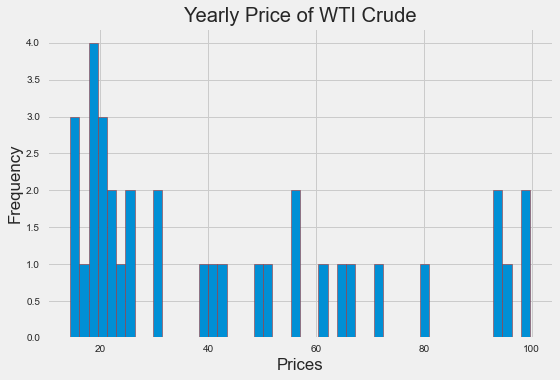

<Figure size 720x1080 with 0 Axes>

In [47]:
# Histogram Plot with no specified bins
plt.style.use('fivethirtyeight')
plt.hist(y_year, bins= 50, edgecolor='brown', linestyle='solid')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Yearly Price of WTI Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/wti_yearly-4.png')
plt.show()

In [48]:
# Histogram Plot with  specified bins
plt.style.use('fivethirtyeight')
bins=[20, 40, 60, 80, 100 ]
plt.hist(y_year, bins=bins, edgecolor='brown', linestyle='solid', log=True)

median_price=
color="#fc4f30"
plt.axvline(median_price, color=color, label='Median Price')

plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Yearly Price of WTI Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/wti_yearly-5.png')
plt.show()

SyntaxError: invalid syntax (<ipython-input-48-b1a77adf5c32>, line 6)

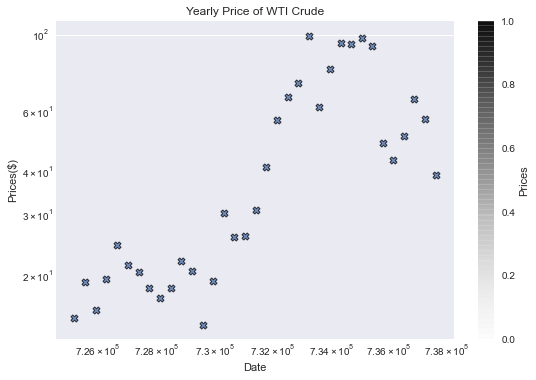

<Figure size 720x1080 with 0 Axes>

In [49]:
# Scatter Plot
plt.style.use('seaborn')
plt.scatter(x_year, y_year, edgecolor='black', alpha=0.75, 
            cmap='Greens', linewidth=1, marker='X')

cbar=plt.colorbar()
cbar.set_label('Prices')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Prices($)')
plt.title('Yearly Price of WTI Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/wti_yearly-6.png')
plt.show()

### Combined Plot for Brent Oil Price

<Figure size 1440x720 with 0 Axes>

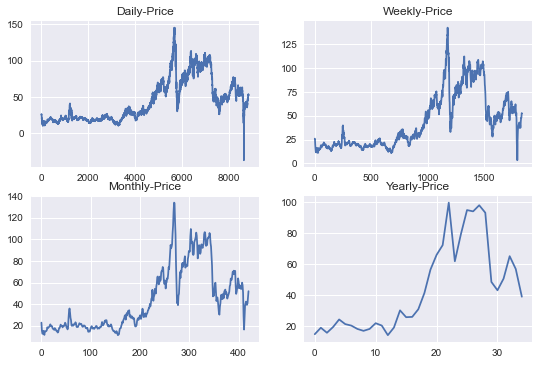

In [53]:
# Plot the prices of brent crude for all (daily, weekly, monthly, yearly)
plt.figure(figsize=(20,10))
fig, axes = plt.subplots(nrows=2, ncols=2)

wti_price_daily_df2['Price($)'].plot(ax=axes[0,0]); axes[0,0].set_title('Daily-Price')

wti_price_weekly_df2['Price($)'].plot(ax=axes[0,1]); axes[0,1].set_title('Weekly-Price')

wti_price_monthly_df2['Price($)'].plot(ax=axes[1,0]); axes[1,0].set_title('Monthly-Price')

wti_price_yearly_df2['Price($)'].plot(ax=axes[1,1]); axes[1,1].set_title('Yearly-Price')

plt.savefig('./images/wti-combined-price.png')
plt.show()

### Mathematical Operations

In [27]:
# describe the daily dataset
wti_price_daily_df2.describe()

,Price($)
count,8841.000000
mean,44.034205
std,28.839152
min,-36.980000
25%,19.790000
50%,31.910000
75%,62.530000
max,145.310000


In [54]:
# describe the weekly dataset
wti_price_weekly_df2.describe()

,Price($)
count,1831.000000
mean,44.068859
std,28.804385
min,3.320000
25%,19.835000
50%,32.110000
75%,62.300000
max,142.520000


In [55]:
# describe the monthly dataset
wti_price_monthly_df2.describe()

,Price($)
count,421.000000
mean,44.055226
std,28.760517
min,11.350000
25%,19.800000
50%,31.820000
75%,62.260000
max,133.880000


In [56]:
# describe the yearly dataset
wti_price_yearly_df2.describe()

,Price($)
count,35.000000
mean,44.072286
std,28.214382
min,14.420000
25%,20.110000
50%,31.080000
75%,63.590000
max,99.670000


In [57]:
# Mean of Daily Price of WTI Crude
wti_price_daily_df2["Price($)"].mean()

44.03420540662807

In [58]:
# Mean of Weekly Price of WTI Crude
wti_price_weekly_df2["Price($)"].mean()

44.06885854724208

In [59]:
# Mean of Monthly Price of WTI Crude 
wti_price_monthly_df2["Price($)"].mean()

44.05522565320666

In [60]:
# Mean of yealry Price of WTI Crude
wti_price_yearly_df2["Price($)"].mean()

44.07228571428572

In [61]:
# Max and Min Value of Daily WTI
max_daily = wti_price_daily_df2["Price($)"].max()
print(max_daily)

min_daily = wti_price_daily_df2["Price($)"].min()
print(min_daily)

145.31
-36.98


In [64]:
# Max and Min Value of Weekly WTI 
max_weekly = wti_price_weekly_df2["Price($)"].max()
print(max_weekly)

min_weekly = wti_price_weekly_df2["Price($)"].min()
print(min_weekly)

142.52
3.32


In [65]:
# Max and Min Value of Monthly WTI
max_monthly= wti_price_monthly_df2["Price($)"].max()
print(max_monthly)

min_monthly = wti_price_monthly_df2["Price($)"].min()
print(min_monthly)

133.88
11.35


In [66]:
# Max and Min Value of Daily WTI
max_yearly = wti_price_yearly_df2["Price($)"].max()
print(max_yearly)

min_yearly = wti_price_yearly_df2["Price($)"].min()
print(min_yearly)

99.67
14.42


### Inferences and Recommendation

[Click here to read from this file]('https://wwww.google.drive)

### Created by **@chisomloius**